In [3]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.1 MB/s eta 0:00:00 0:00:01


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

In [5]:
URI = "neo4j+s://ae075b2d.databases.neo4j.io"
AUTH = ("neo4j", "LEmFVM-ZDBa4wv9YkZqQWBweUtSVcUJeoyM9ODaJEXc")
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

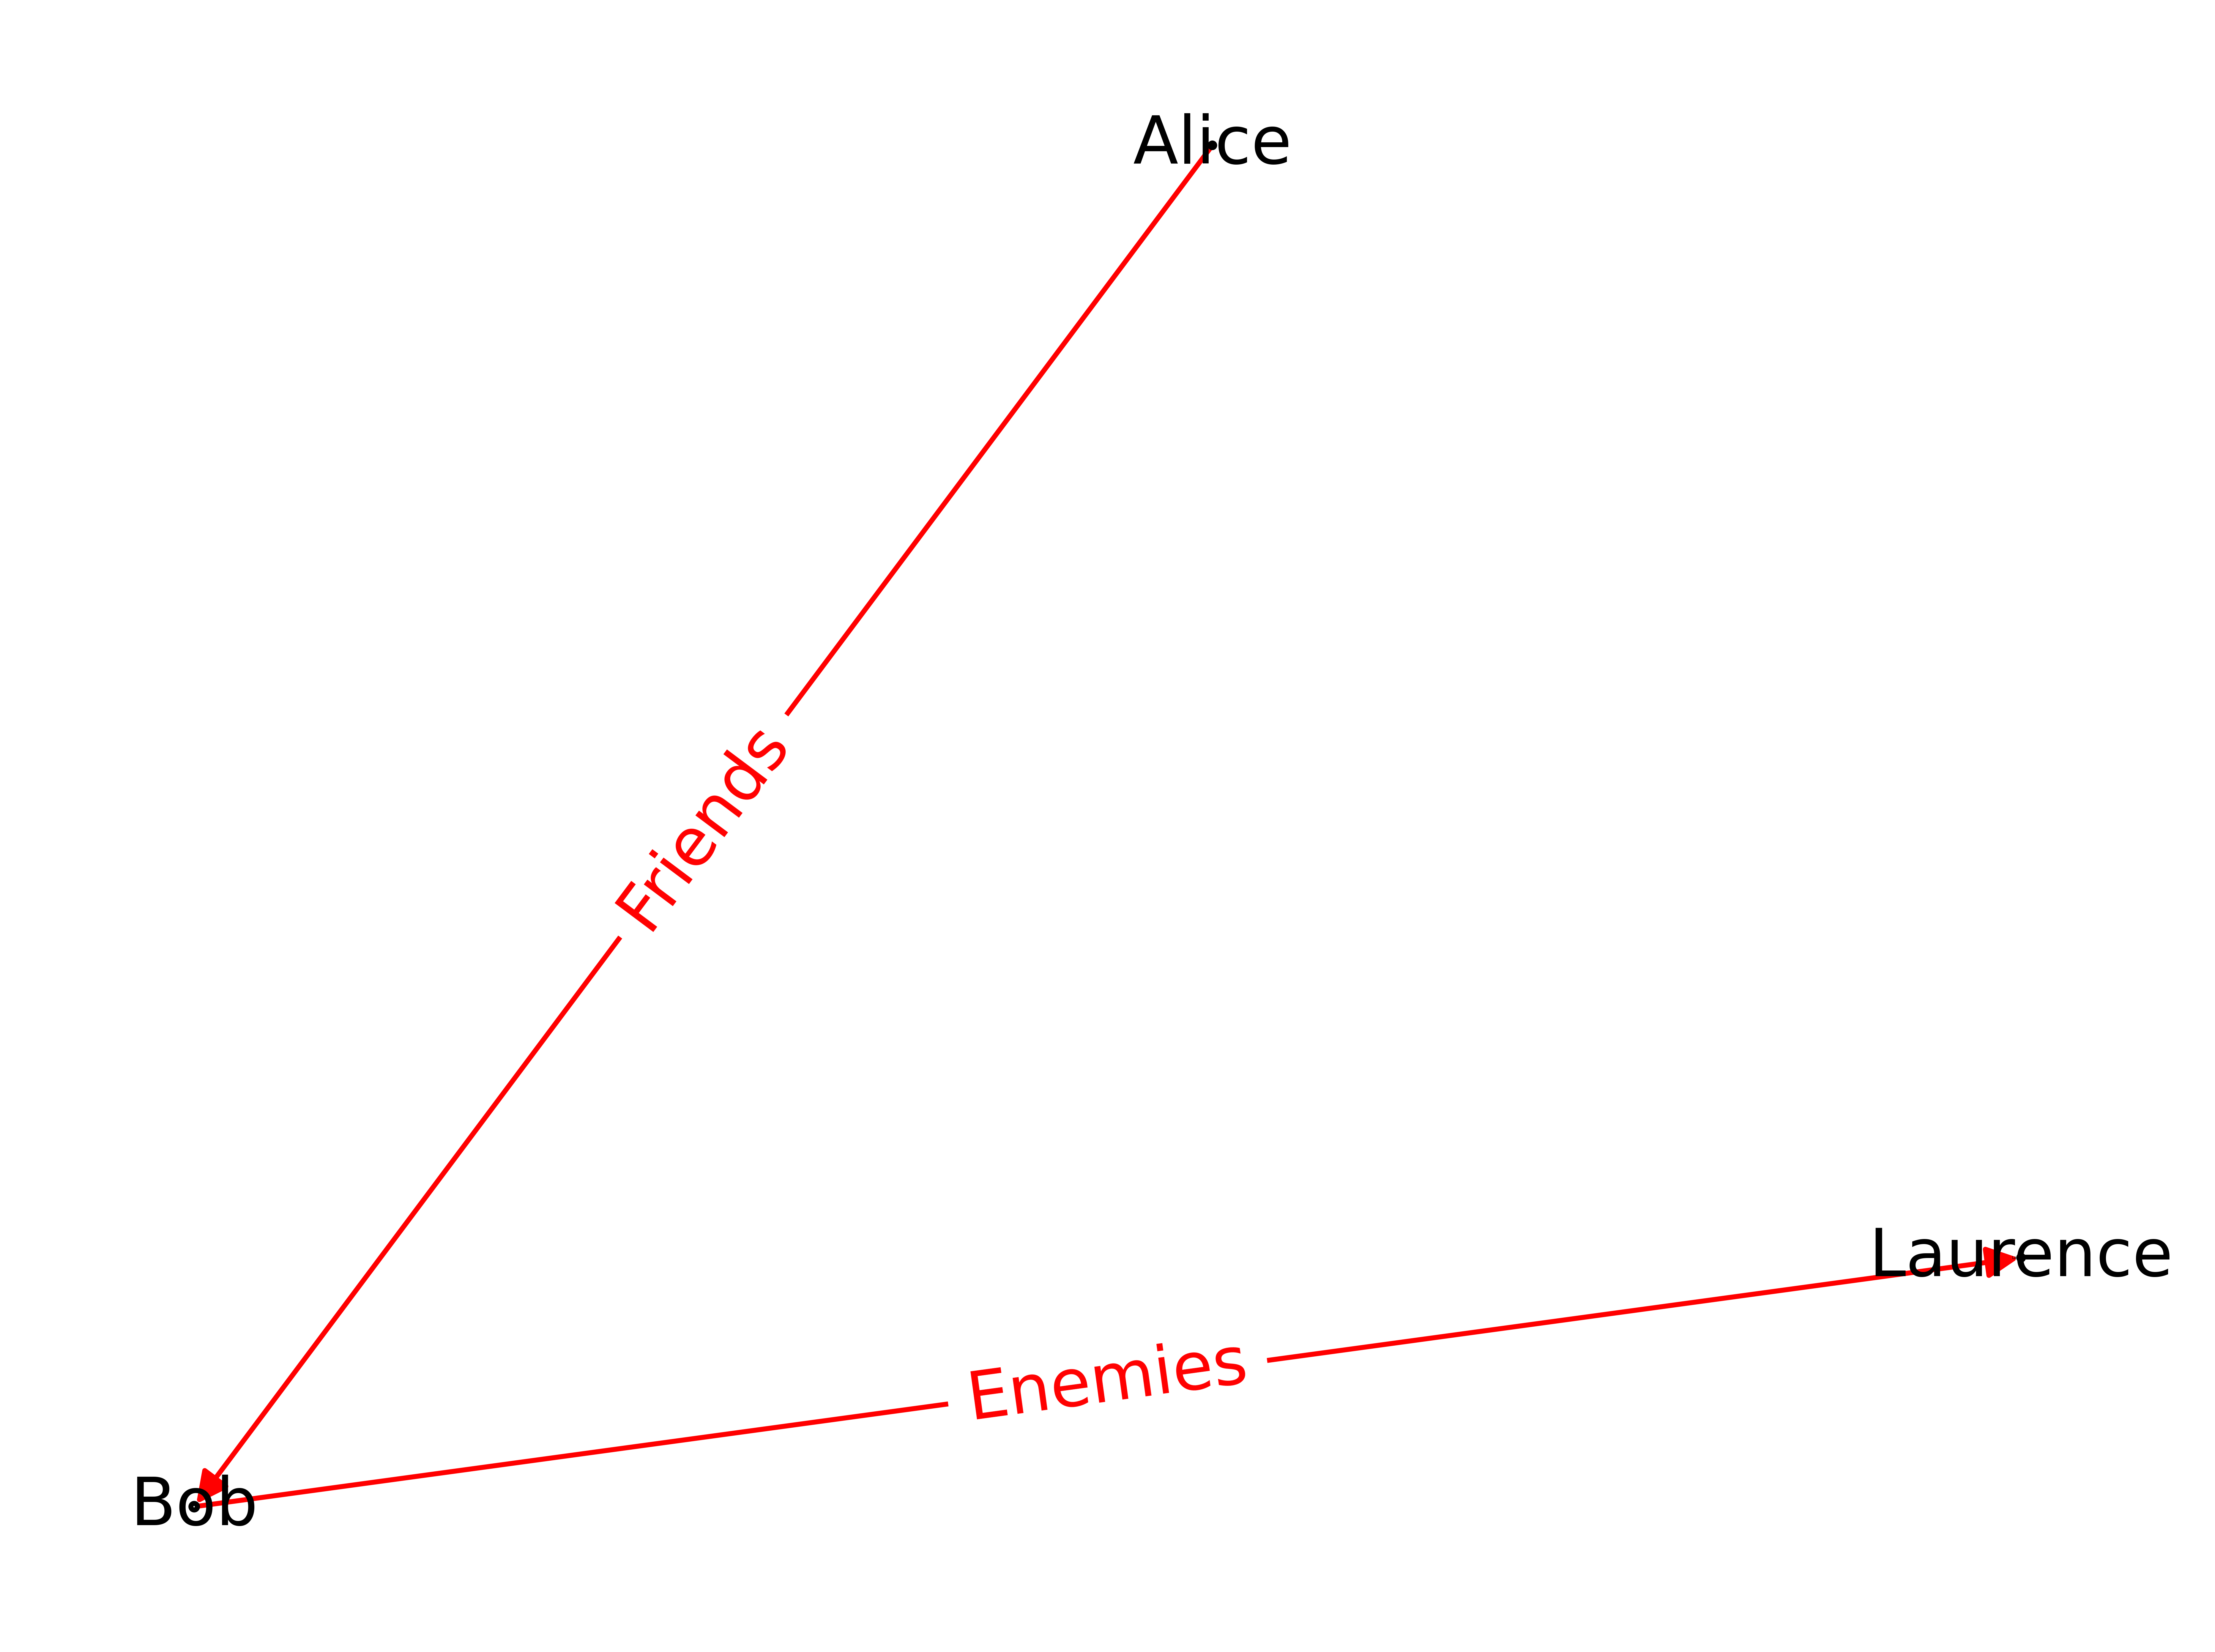

In [10]:
#credit: https://github.com/dhyeythumar/Knowledge-Graph-with-Neo4j/blob/main/visualization.py
def drawKnowledgeGraph(triplets:pd.DataFrame, font_size_of_node_vals:int, font_size_of_relation:int, size_of_node:int) -> None:
        k_graph = nx.from_pandas_edgelist(triplets, 'subject', 'object', create_using=nx.MultiDiGraph() )
        node_deg = nx.degree(k_graph)
        layout = nx.spring_layout(k_graph, k=15, iterations=20, scale=2)
        plt.figure(num=None, figsize=(120, 90), dpi=80)
        nx.draw_networkx(k_graph, 
            node_size=[int(deg[1]) * size_of_node for deg in node_deg],
            arrowsize=200,
            linewidths=15,
            width=15,
            pos=layout,
            edge_color='red',
            edgecolors='black',
            node_color='white',
        )
        labels = dict(zip(list(zip(triplets.subject, triplets.object)), triplets['relation'].tolist()))
        nx.draw_networkx_labels(k_graph,
                            pos=layout,
                            font_size=font_size_of_node_vals,  # Change this to adjust the font size inside nodes
                            font_color='black')

        nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels, font_color='red',font_size=font_size_of_relation )
        plt.axis('off')
        plt.show()
test=pd.DataFrame({'subject':['Alice', 'Bob'], 'object':['Bob', 'Laurence'], 'relation':['Friends', 'Enemies']})
drawKnowledgeGraph(test, 200,200,200)

In [13]:
!git status
!git add .
!git commit -m "Knowledge graph mock-up w/o N4J"
!git push origin main

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   .ipynb_checkpoints/Knowledge_Graph-checkpoint.ipynb
	modified:   Knowledge_Graph.ipynb

[main 0b7ab1c] Knowledge graph mock-up w/o N4J
 2 files changed, 132 insertions(+), 2 deletions(-)
 create mode 100644 .ipynb_checkpoints/Knowledge_Graph-checkpoint.ipynb
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 12 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 232.68 KiB | 15.51 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
To https://github.com/rishikasrinivas/KnowledgeGraphMentalHealth.git
   986c1d4..0b7ab1c  main -> main
